In [5]:
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import matplotlib.pyplot as plt

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

A. [5] Preprocessing
Pada bagian ini, Anda diminta untuk melakukan preprocessing pada korpus Anda. Hasil
preprocessing akan dipakai di bagian-bagian selanjutnya.
1. [3] Lakukan lowercasing dan tokenisasi. Lowercasing dilakukan dengan method
lower() dan tokenisasi dilakukan dengan word_tokenize dari NLTK. Tampilkan
10 abstrak teratas.
2. [2] Lakukan penghapusan semua karakter selain alfanumerik menggunakan
method isalnum(). Tampilkan 10 abstrak teratas.

In [7]:
korpus = pd.read_csv("korpus_abstrak.csv")

In [8]:
korpus.head()

,Link,Abstrak,Author,Pub,Ed
0,detail.jsp?id=46123&lokasi=lokal,Analisis Faktor yang Memengaruhi Loyalitas Kon...,Sumarliyanti,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Putu Wuri Handayani
1,detail.jsp?id=46126&lokasi=lokal,Analisis Perilaku Pengguna Dalam Mencapai Kred...,S. Reyneta Carissa Anwar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani
2,detail.jsp?id=46149&lokasi=lokal,Desain Interaksi Aplikasi untuk Mengakomodasi ...,Mila Alief Alya,"Publisher: Depok"": Fakultas Ilmu Komputer Uni...",Harry Budi Santoso S
3,detail.jsp?id=46167&lokasi=lokal,Evaluasi dan Pengembangan Alternatif Desain In...,Ivana Putri,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso
4,detail.jsp?id=45008&lokasi=lokal,Evaluasi Desain Materi Instruksional Berdasark...,Aulia Chairunisa,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Harri Budi Santoso


In [9]:
def lower_token(abstract):
  lowered = abstract.lower()
  tokenized = word_tokenize(lowered)
  
  return tokenized

In [10]:
def alnum(x):
  result = []
  for token in x:
    if token.isalnum():
      result += [token]
  return result

In [11]:
korpus["tokenized"] = korpus["Abstrak"].map(lambda x: lower_token(x))

In [12]:
for i in range(10):
  print(i, korpus["tokenized"][i])

0 ['analisis', 'faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'membeli', 'makanan', 'pada', 'layanan', 'online', 'delivery-sourcing', ':', 'studi', 'kasus', 'go-food', 'penelitian', 'ini', 'dilakukan', 'untuk', 'menganalisis', 'faktor-faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'pembelian', 'makanan', 'pada', 'online', 'delivery-sourcing', 'di', 'indonesia', ',', 'yaitu', 'go-food', '.', 'faktor-faktor', 'yang', 'digunakan', 'dalam', 'model', 'penelitian', 'yang', 'diajukan', 'berasal', 'dari', 'tiga', 'teori', ',', 'yaitu', 'teori', 'kualitas', 'hubungan', ',', 'model', 'perceived', 'value', '(', 'perval', ')', ',', 'dan', 'mobile', 'service', 'quality', '(', 'm-s-qual', ')', '.', 'total', 'responden', 'yang', 'berhasil', 'diperoleh', 'adalah', 'sebanyak', '852', 'data', 'lengkap', '.', 'data', 'tersebut', 'dianalisis', 'menggunakan', 'pendekatan', 'kuantitatif', 'dengan', 'metode', 'covariance-based', 'structural', 'equation', 'model', '(', '

In [13]:
korpus["preprocess"] = korpus["tokenized"].map(lambda x: alnum(x))

In [14]:
for i in range(10):
  print(i, korpus["preprocess"][i])

0 ['analisis', 'faktor', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'membeli', 'makanan', 'pada', 'layanan', 'online', 'studi', 'kasus', 'penelitian', 'ini', 'dilakukan', 'untuk', 'menganalisis', 'yang', 'memengaruhi', 'loyalitas', 'konsumen', 'dalam', 'pembelian', 'makanan', 'pada', 'online', 'di', 'indonesia', 'yaitu', 'yang', 'digunakan', 'dalam', 'model', 'penelitian', 'yang', 'diajukan', 'berasal', 'dari', 'tiga', 'teori', 'yaitu', 'teori', 'kualitas', 'hubungan', 'model', 'perceived', 'value', 'perval', 'dan', 'mobile', 'service', 'quality', 'total', 'responden', 'yang', 'berhasil', 'diperoleh', 'adalah', 'sebanyak', '852', 'data', 'lengkap', 'data', 'tersebut', 'dianalisis', 'menggunakan', 'pendekatan', 'kuantitatif', 'dengan', 'metode', 'structural', 'equation', 'model', 'yang', 'didukung', 'oleh', 'tools', 'amos', 'hasil', 'analisis', 'yang', 'diperoleh', 'adalah', 'faktor', 'emotional', 'value', 'social', 'value', 'dan', 'price', 'value', 'for', 'money', 'memeng

In [15]:
korpus.head()

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess
0,detail.jsp?id=46123&lokasi=lokal,Analisis Faktor yang Memengaruhi Loyalitas Kon...,Sumarliyanti,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Putu Wuri Handayani,"[analisis, faktor, yang, memengaruhi, loyalita...","[analisis, faktor, yang, memengaruhi, loyalita..."
1,detail.jsp?id=46126&lokasi=lokal,Analisis Perilaku Pengguna Dalam Mencapai Kred...,S. Reyneta Carissa Anwar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani,"[analisis, perilaku, pengguna, dalam, mencapai...","[analisis, perilaku, pengguna, dalam, mencapai..."
2,detail.jsp?id=46149&lokasi=lokal,Desain Interaksi Aplikasi untuk Mengakomodasi ...,Mila Alief Alya,"Publisher: Depok"": Fakultas Ilmu Komputer Uni...",Harry Budi Santoso S,"[desain, interaksi, aplikasi, untuk, mengakomo...","[desain, interaksi, aplikasi, untuk, mengakomo..."
3,detail.jsp?id=46167&lokasi=lokal,Evaluasi dan Pengembangan Alternatif Desain In...,Ivana Putri,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso,"[evaluasi, dan, pengembangan, alternatif, desa...","[evaluasi, dan, pengembangan, alternatif, desa..."
4,detail.jsp?id=45008&lokasi=lokal,Evaluasi Desain Materi Instruksional Berdasark...,Aulia Chairunisa,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Harri Budi Santoso,"[evaluasi, desain, materi, instruksional, berd...","[evaluasi, desain, materi, instruksional, berd..."


B. [36] BM25
Pada bagian ini, Anda akan dipandu untuk melakukan implementasi retrieval
menggunakan BM25 secara langkah demi langkah pada korpus yang telah melalui
tahapan pre-processing.
1. [2] Untuk setiap abstrak, buatlah dictionary dengan key berupa token dan value
berupa term frequency. Anda diperkenankan menggunakan library collections,
namun Anda tidak wajib menggunakan library ini. Tampilkan dictionary untuk
masing-masing dari 10 abstrak teratas.

In [16]:
from collections import Counter

In [17]:
def word_counter(word_list):
    wd_counts = Counter()
    wd_counts.update(word_list)
    dict_counts = dict(wd_counts)
    return dict_counts

In [18]:
korpus["tf"] = korpus["preprocess"].map(lambda x: word_counter(x))

In [19]:
for i in range(10):
  print(i, korpus["tf"][i])

0 {'analisis': 2, 'faktor': 5, 'yang': 10, 'memengaruhi': 5, 'loyalitas': 2, 'konsumen': 2, 'dalam': 3, 'membeli': 1, 'makanan': 2, 'pada': 2, 'layanan': 1, 'online': 2, 'studi': 1, 'kasus': 1, 'penelitian': 2, 'ini': 1, 'dilakukan': 1, 'untuk': 1, 'menganalisis': 1, 'pembelian': 1, 'di': 4, 'indonesia': 1, 'yaitu': 2, 'digunakan': 1, 'model': 3, 'diajukan': 1, 'berasal': 1, 'dari': 1, 'tiga': 1, 'teori': 2, 'kualitas': 1, 'hubungan': 1, 'perceived': 3, 'value': 7, 'perval': 1, 'dan': 4, 'mobile': 1, 'service': 1, 'quality': 1, 'total': 1, 'responden': 1, 'berhasil': 1, 'diperoleh': 2, 'adalah': 2, 'sebanyak': 1, '852': 1, 'data': 2, 'lengkap': 1, 'tersebut': 1, 'dianalisis': 1, 'menggunakan': 1, 'pendekatan': 1, 'kuantitatif': 1, 'dengan': 1, 'metode': 1, 'structural': 1, 'equation': 1, 'didukung': 1, 'oleh': 1, 'tools': 1, 'amos': 1, 'hasil': 1, 'emotional': 2, 'social': 1, 'price': 1, 'for': 1, 'money': 1, 'secara': 3, 'positif': 3, 'terhadap': 3, 'mana': 3, 'paling': 3, 'kuat': 3, 

2. [6] Buatlah daftar vocabulary (token yang unik) dari seluruh abstrak dan hitung
document frequency serta inverse document frequency (idf) untuk setiap
vocabulary. Untuk perhitungan idf, gunakan rumus berikut:
idf = log(1 + (N−df+0.5)/df+0.5) dan fungsi math.log (natural logarithm). Anda dilarang 
menggunakan library yang dapat menghitung nilai idf secara langsung.


In [20]:
df = dict()

for i in korpus["preprocess"]:
    for word in set(i):
        if word not in df.keys():
            df[word] = 1
        else:
            df[word] += 1
print(df)

{'dari': 372, 'online': 78, 'studi': 88, 'tiga': 50, 'kuat': 7, 'membeli': 9, 'diajukan': 14, 'model': 120, 'structural': 30, 'hasil': 315, 'loyalitas': 4, 'perval': 1, 'sebanyak': 35, 'mana': 31, 'kualitas': 46, 'for': 15, 'memengaruhi': 41, 'positif': 28, 'dalam': 376, 'didukung': 12, 'responden': 73, 'price': 4, 'billing': 3, 'diperoleh': 65, 'equation': 32, 'loyalty': 4, 'secara': 189, 'tersebut': 282, 'value': 14, 'efficiency': 5, 'selain': 105, 'social': 26, 'kuantitatif': 56, 'yang': 466, 'ini': 454, 'teori': 45, 'dilakukan': 272, 'lengkap': 15, 'money': 2, 'menganalisis': 41, 'dengan': 453, 'oleh': 212, 'responsiveness': 4, 'berasal': 19, 'layanan': 53, 'paling': 50, 'quality': 24, 'pendekatan': 117, 'tools': 28, 'service': 23, 'data': 218, 'penelitian': 340, 'faktor': 71, '852': 1, 'kasus': 82, 'makanan': 7, 'itu': 177, 'pengaruh': 61, 'perceived': 30, 'satisfaction': 13, 'adalah': 307, 'berhasil': 49, 'mobile': 33, 'emotional': 1, 'memiliki': 146, 'amos': 20, 'metode': 221, '

In [21]:
import math
idf = dict()
N = len(korpus)
for term in df.keys():
    idf[term] = math.log((1+(N-df[term]+0.5)/(df[term]+0.5)), math.exp(1))
print(idf)

{'dari': 0.23249565688449003, 'online': 1.7896340699157414, 'studi': 1.6697301426902205, 'tiga': 2.23075935842279, 'kuat': 4.137829674161839, 'membeli': 3.901440896097609, 'diajukan': 3.4785840452775756, 'model': 1.3610829417733945, 'structural': 2.7350060110907384, 'hasil': 0.3985740127228365, 'loyalitas': 4.648655297927831, 'perval': 5.74726758659594, 'sebanyak': 2.5831999982227343, 'mana': 2.7027451488725167, 'kualitas': 2.3132803821107935, 'for': 3.4118926707789035, 'memengaruhi': 2.427039267467452, 'positif': 2.8028286074294995, 'dalam': 0.221814647464156, 'didukung': 3.6270040503958487, 'responden': 1.8554472884853133, 'price': 4.648655297927831, 'billing': 4.899969726208736, 'diperoleh': 1.970682552062898, 'equation': 2.6714926053684125, 'loyalty': 4.648655297927831, 'secara': 0.9083436701816232, 'tersebut': 0.5090541441176086, 'value': 3.4785840452775756, 'efficiency': 4.447984602465679, 'selain': 1.4940217417879829, 'social': 2.8755879617119278, 'kuantitatif': 2.11849205655170

3. [4] Carilah document length (dl) dari setiap abstrak dan average document length
(adl) dari keseluruhan abstrak. Tampilkan nilai dl dari 10 abstrak teratas.

In [22]:
korpus["dl"] = korpus["preprocess"].map(lambda x: len(x))

In [23]:
for i in range(10):
  print(i, korpus["dl"][i])

0 148
1 105
2 124
3 138
4 126
5 108
6 185
7 135
8 151
9 278


In [24]:
tot = 0
for i in korpus["dl"]:
  tot += i
adl = tot/N

In [25]:
print(adl)

177.0277185501066


4. [15] Buatlah fungsi score(query, doc, k, b) yang memberi output nilai skor
relevansi antara query dengan masing-masing abstrak (doc). Skor relevansi
tersebut dihitung dengan menggunakan rumus:
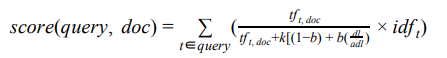
Pemecahan query menjadi beberapa term t harus dilakukan dengan word_tokenize
dari NLTK.




In [26]:
idf = idf
adl = adl
def score(query, doc, k, b):
  #String query
  #Series doc (sebuah row dari data yang berisi data tentang korpus)
  #int k,b
  #TF/(TF + k*(1 - b + b*dl/adl)) * idf
  list_query = word_tokenize(query)
  score = 0
  dl = doc["dl"]
  tf = doc["tf"]
  for word in list_query:
    if word in tf.keys():
      tft = tf[word]
      idft = idf[word]
      score += (tft/(tft + k*(1-b + b*dl/adl)))*idft
    #else tidak menambahkan score

  return score

5. [9] Gunakan fungsi score yang telah Anda buat untuk mencari 10 abstrak dengan
relevansi tertinggi untuk query, nilai k, dan b berikut ini:

a. query: information retrieval, k=1.2, b=0.75

b. query: sistem manajemen pengetahuan, k=1.2, b=0.5

c. query: knowledge discovery, k=2, b=0.5

Tampilkan 10 tokenized abstrak dengan nilai relevansi tertinggi untuk
masing-masing dari (a), (b), dan (c). Anda dilarang menggunakan library yang
merupakan implementasi BM25 secara langsung.

In [27]:
nomor5 = korpus.copy()

In [28]:
#a. query: information retrieval, k=1.2, b=0.75
for row in nomor5.iterrows():
  scr = score("information retrieval", row[1], 1.2, 0.75)
  nomor5.loc[row[0], "b5a"] = scr
  

In [29]:
b5a = nomor5.sort_values(by="b5a", ascending=False).head(10).copy()
b5a

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,b5a
397,detail.jsp?id=44987&lokasi=lokal,Perolehan Informasi Lintas Bahasa Menggunakan ...,Rinaldi Andrian Rahmanda,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Mirna Adriani,"[perolehan, informasi, lintas, bahasa, menggun...","[perolehan, informasi, lintas, bahasa, menggun...","{'perolehan': 3, 'informasi': 3, 'lintas': 2, ...",176,4.640851
188,detail.jsp?id=4581&lokasi=lokal,Penelitian ini merancang dan mengimplementasik...,"Anshori, Moh. Kholis","Publisher: Depok:F asilkom UI, 1997 Call Numb...",Zainal Hasibuan,"[penelitian, ini, merancang, dan, mengimplemen...","[penelitian, ini, merancang, dan, mengimplemen...","{'penelitian': 1, 'ini': 2, 'merancang': 1, 'd...",201,3.192783
381,detail.jsp?id=8508&lokasi=lokal,Sistem informasi eksekutif sebagai salah satu ...,"M. Rahmat Widyanto,","Publisher: Depok: Fasilkom UI, 1998 Call Numb...",Sjarif Abdat,"[sistem, informasi, eksekutif, sebagai, salah,...","[sistem, informasi, eksekutif, sebagai, salah,...","{'sistem': 6, 'informasi': 27, 'eksekutif': 5,...",202,3.185807
50,detail.jsp?id=44308&lokasi=lokal,Kerja Praktik : Analisis Faktor-Faktor yang Me...,Devi Fadhlullahi Alaika,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Putu Wuri Handayani,"[kerja, praktik, :, analisis, faktor-faktor, y...","[kerja, praktik, analisis, yang, memengaruhi, ...","{'kerja': 1, 'praktik': 1, 'analisis': 2, 'yan...",206,2.626738
36,detail.jsp?id=46656&lokasi=lokal,Analisis Faktor Pengaruh Jenis Interaksi dan E...,Atikah Zahrah Halim,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani,"[analisis, faktor, pengaruh, jenis, interaksi,...","[analisis, faktor, pengaruh, jenis, interaksi,...","{'analisis': 1, 'faktor': 1, 'pengaruh': 1, 'j...",240,2.573448
131,detail.jsp?id=44953&lokasi=lokal,Faktor-Faktor Kualitas Informasi dan Kredibili...,Astrinanda Islami,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Achmad Nizar,"[faktor-faktor, kualitas, informasi, dan, kred...","[kualitas, informasi, dan, kredibilitas, sumbe...","{'kualitas': 2, 'informasi': 11, 'dan': 11, 'k...",195,2.367861
110,detail.jsp?id=44984&lokasi=lokal,Ekstraksi Frase Kunci pada Pertanyaan Forum Ke...,Ilham Fathy Saputra,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Rahmad Mahendra,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...","[ekstraksi, frase, kunci, pada, pertanyaan, fo...","{'ekstraksi': 2, 'frase': 2, 'kunci': 2, 'pada...",119,2.247219
416,detail.jsp?id=46138&lokasi=lokal,Rancangan Penerapan Strategi Pembelajaran Prog...,Irma Latifatul Laily,Publisher: Depok: Fakultas Ilmu Komputer Unve...,Ade Azurat,"[rancangan, penerapan, strategi, pembelajaran,...","[rancangan, penerapan, strategi, pembelajaran,...","{'rancangan': 3, 'penerapan': 1, 'strategi': 2...",146,2.059200
143,detail.jsp?id=46660&lokasi=lokal,Fitur Software Product Lines Menggunakan Delta...,Bthari Smartnastiti,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Ade Azurat,"[fitur, software, product, lines, menggunakan,...","[fitur, software, product, lines, menggunakan,...","{'fitur': 4, 'software': 2, 'product': 2, 'lin...",160,2.012125
103,detail.jsp?id=4601&lokasi=lokal,Penelitian ini bertujuan mengembangkan sistem ...,"Budi, Indra","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Zainal Hasibuan,"[penelitian, ini, bertujuan, mengembangkan, si...","[penelitian, ini, bertujuan, mengembangkan, si...","{'penelitian': 3, 'ini': 2, 'bertujuan': 1, 'm...",168,1.987337


In [85]:
for i in b5a["preprocess"]:
  print(i)

['perolehan', 'informasi', 'lintas', 'bahasa', 'menggunakan', 'korpus', 'paralel', 'dengan', 'metode', 'bilingual', 'mapping', 'perolehan', 'informasi', 'lintas', 'bahasa', 'atau', 'cross', 'language', 'information', 'retrieval', 'clir', 'merupakan', 'salah', 'satu', 'task', 'di', 'bidang', 'information', 'retrieval', 'untuk', 'melakukan', 'perolehan', 'informasi', 'dimana', 'ada', 'perbedaan', 'bahasa', 'antara', 'dokumen', 'dengan', 'query', 'yang', 'ingin', 'ditanyakan', 'salah', 'satu', 'metode', 'yang', 'dapat', 'digunakan', 'untuk', 'memecahkan', 'masalah', 'ini', 'adalah', 'dengan', 'menggunakan', 'language', 'model', 'bilingual', 'untuk', 'mencari', 'kemiripan', 'antara', 'query', 'dengan', 'yang', 'relevan', 'pada', 'penelitian', 'ini', 'sebuah', 'pendekatan', 'bernama', 'bilingual', 'mapping', 'akan', 'digunakan', 'untuk', 'membuat', 'language', 'model', 'bilingual', 'dan', 'menggunakannya', 'dalam', 'melakukan', 'clir', 'language', 'model', 'kedua', 'bahasa', 'diciptakan', '

In [31]:
#b. query: sistem manajemen pengetahuan, k=1.2, b=0.5
for row in nomor5.iterrows():
  scr = score("sistem manajemen pengetahuan", row[1], 1.2, 0.5)
  nomor5.loc[row[0], "b5b"] = scr

In [32]:
b5b = nomor5.sort_values(by="b5b", ascending=False).head(10).copy()
b5b

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,b5a,b5b
461,detail.jsp?id=43510&lokasi=lokal,Usability Evaluation Sistem Informasi Manajeme...,Azka Khairun Nisa,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Harry Budi Santoso,"[usability, evaluation, sistem, informasi, man...","[usability, evaluation, sistem, informasi, man...","{'usability': 3, 'evaluation': 2, 'sistem': 7,...",126,0.000000,3.610291
240,detail.jsp?id=46156&lokasi=lokal,Pembangunan Knowledge Base melalui Pendekatan ...,Hadi Syah Putra,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Rahmat Mahendra,"[pembangunan, knowledge, base, melalui, pendek...","[pembangunan, knowledge, base, melalui, pendek...","{'pembangunan': 1, 'knowledge': 3, 'base': 3, ...",147,0.000000,3.281836
453,detail.jsp?id=4507&lokasi=lokal,Kunci kesuksesan seubah sistem kontrol(Real-Ti...,Mephri,"Publisher: Depok: Fasilkom UI, 1977 Call Num...",Wishnu Prasetya,"[kunci, kesuksesan, seubah, sistem, kontrol, (...","[kunci, kesuksesan, seubah, sistem, kontrol, s...","{'kunci': 1, 'kesuksesan': 1, 'seubah': 1, 'si...",311,0.000000,3.248660
264,detail.jsp?id=46127&lokasi=lokal,Penerapan Big Data pada Data Rekam Medis Mengg...,Fadlurrahman Ar Rafiv,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Yova Ruldeviyani,"[penerapan, big, data, pada, data, rekam, medi...","[penerapan, big, data, pada, data, rekam, medi...","{'penerapan': 1, 'big': 2, 'data': 16, 'pada':...",234,0.000000,3.122056
249,detail.jsp?id=41959&lokasi=lokal,Pemodelan Arsitektur Teknologi Sistem Informas...,Rizky Amalia Kurnia,"Publisher: Depok : Fakultas Ilmu Komputer, 20...",Puspa Indahati Sandhyaduhita,"[pemodelan, arsitektur, teknologi, sistem, inf...","[pemodelan, arsitektur, teknologi, sistem, inf...","{'pemodelan': 1, 'arsitektur': 3, 'teknologi':...",129,0.000000,3.090981
418,detail.jsp?id=4599&lokasi=lokal,Sistem personalisasi merupakan salah satu solu...,"Paat, Nancy","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Johny Moningka,"[sistem, personalisasi, merupakan, salah, satu...","[sistem, personalisasi, merupakan, salah, satu...","{'sistem': 3, 'personalisasi': 5, 'merupakan':...",169,0.000000,2.859464
15,detail.jsp?id=4635&lokasi=lokal,"Dalam membangun suatu aplikasi, sering kali di...","Yudha, Ronggo Gundala","Publisher: Depok: Fasilkom UI, 2001 Call Numb...",Eko Budiardjo,"[dalam, membangun, suatu, aplikasi, ,, sering,...","[dalam, membangun, suatu, aplikasi, sering, ka...","{'dalam': 5, 'membangun': 1, 'suatu': 5, 'apli...",257,0.000000,2.807393
399,detail.jsp?id=43487&lokasi=lokal,Perumusan Kamus Data Kompetensi Pegawai Studi ...,Haritztya Azka Zhaviri Masud,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Putu Wuri Handayani,"[perumusan, kamus, data, kompetensi, pegawai, ...","[perumusan, kamus, data, kompetensi, pegawai, ...","{'perumusan': 2, 'kamus': 5, 'data': 17, 'komp...",220,0.000000,2.806032
8,detail.jsp?id=44959&lokasi=lokal,Analisis Kegiatan Berbagi Pengetahuan pada Kom...,Septiani Andriane B. Sinaga,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Putu Wuri Handayani,"[analisis, kegiatan, berbagi, pengetahuan, pad...","[analisis, kegiatan, berbagi, pengetahuan, pad...","{'analisis': 1, 'kegiatan': 1, 'berbagi': 2, '...",151,0.000000,2.523551
43,detail.jsp?id=43514&lokasi=lokal,Analisis Faktor-Faktor Internal dan Eksternal ...,Annisa Monicha Sari,"Publisher: Depok : Fakultas Ilmu Komputer UI,...",Achmad Nizar Hidayanto,"[analisis, faktor-faktor, internal, dan, ekste...","[analisis, internal, dan, eksternal, yang, mem...","{'analisis': 1, 'internal': 4, 'dan': 5, 'ekst...",269,1.708105,2.463893


In [84]:
for i in b5b["preprocess"]:
  print(i)

['usability', 'evaluation', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'studi', 'kasus', 'aplikasi', 'instalasi', 'gawat', 'darurat', 'rumah', 'sakit', 'umum', 'daerah', 'pasar', 'minggu', 'penggunaan', 'teknologi', 'informasi', 'telah', 'meluas', 'ke', 'rumah', 'sakit', 'tujuan', 'dari', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'adalah', 'meningkatkan', 'kualitas', 'pelayanan', 'pasien', 'meningkatkan', 'efisiensi', 'dan', 'efektivitas', 'pekerja', 'penelitian', 'ini', 'bertujuan', 'untuk', 'mencari', 'masalah', 'usability', 'dan', 'memberi', 'rekomendasi', 'prototipe', 'sistem', 'informasi', 'manajemen', 'rumah', 'sakit', 'sehingga', 'dapat', 'mencapai', 'tujuan', 'dari', 'sistem', 'usability', 'evaluation', 'dilakukan', 'dengan', 'metode', 'contextual', 'inquiry', 'yang', 'melibatkan', 'pengguna', 'sistem', 'yaitu', 'dokter', 'yang', 'berjumlah', 'lima', 'orang', 'penelitian', 'dilakukan', 'pada', 'simrs', 'igd', 'rsud', 'pasar', 'minggu', 'hasil', 'penelitia

In [34]:
#c. query: knowledge discovery, k=2, b=0.5
for row in nomor5.iterrows():
  scr = score("knowledge discovery", row[1], 2, 0.5)
  nomor5.loc[row[0], "b5c"] = scr

In [35]:
b5c = nomor5.sort_values(by="b5c", ascending=False).head(10)
b5c

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,b5a,b5b,b5c
138,detail.jsp?id=43509&lokasi=lokal,Faktor-Faktor yang Mempengaruhi Kesuksesan Imp...,Raisiffah Kunthi,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Dana Indra Sensuse,"[faktor-faktor, yang, mempengaruhi, kesuksesan...","[yang, mempengaruhi, kesuksesan, implementasi,...","{'yang': 10, 'mempengaruhi': 3, 'kesuksesan': ...",231,1.265890,1.823674,2.953899
211,detail.jsp?id=46670&lokasi=lokal,Knowledge Graph Completeness Analytics: Case S...,Avicenna Wisesa,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Fariz Darari,"[knowledge, graph, completeness, analytics, :,...","[knowledge, graph, completeness, analytics, ca...","{'knowledge': 7, 'graph': 7, 'completeness': 1...",167,0.000000,0.000000,2.904134
417,detail.jsp?id=46186&lokasi=lokal,Rancangan Prediktor Akurasi Hasil Segmentasi S...,Zulfikar Ian ifetayo Djakman,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Wisnu Jatmiko,"[rancangan, prediktor, akurasi, hasil, segment...","[rancangan, prediktor, akurasi, hasil, segment...","{'rancangan': 1, 'prediktor': 3, 'akurasi': 7,...",204,0.000000,1.346189,2.837814
43,detail.jsp?id=43514&lokasi=lokal,Analisis Faktor-Faktor Internal dan Eksternal ...,Annisa Monicha Sari,"Publisher: Depok : Fakultas Ilmu Komputer UI,...",Achmad Nizar Hidayanto,"[analisis, faktor-faktor, internal, dan, ekste...","[analisis, internal, dan, eksternal, yang, mem...","{'analisis': 1, 'internal': 4, 'dan': 5, 'ekst...",269,1.708105,2.463893,2.613090
373,detail.jsp?id=46674&lokasi=lokal,Penjajaran Vocabulary antara Data Tabular pada...,Gibran Muhammad Fajar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Adila Alfa Krisnadhi,"[penjajaran, vocabulary, antara, data, tabular...","[penjajaran, vocabulary, antara, data, tabular...","{'penjajaran': 4, 'vocabulary': 6, 'antara': 1...",248,0.000000,0.692982,2.506709
240,detail.jsp?id=46156&lokasi=lokal,Pembangunan Knowledge Base melalui Pendekatan ...,Hadi Syah Putra,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Rahmat Mahendra,"[pembangunan, knowledge, base, melalui, pendek...","[pembangunan, knowledge, base, melalui, pendek...","{'pembangunan': 1, 'knowledge': 3, 'base': 3, ...",147,0.000000,3.281836,2.304407
421,detail.jsp?id=46677&lokasi=lokal,Republikasi Data pada Portal Data Terbuka ke d...,Muhammad Faiz,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Fariz Darari,"[republikasi, data, pada, portal, data, terbuk...","[republikasi, data, pada, portal, data, terbuk...","{'republikasi': 2, 'data': 15, 'pada': 10, 'po...",215,0.000000,0.618641,1.760772
110,detail.jsp?id=44984&lokasi=lokal,Ekstraksi Frase Kunci pada Pertanyaan Forum Ke...,Ilham Fathy Saputra,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Rahmad Mahendra,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...","[ekstraksi, frase, kunci, pada, pertanyaan, fo...","{'ekstraksi': 2, 'frase': 2, 'kunci': 2, 'pada...",119,2.247219,1.539779,1.388508
376,detail.jsp?id=43568&lokasi=lokal,Penyusunan Kerangka untuk Mengevaluasi dan Men...,Nur'aini Syamsiah,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Achmad Nizar Hidayanto,"[penyusunan, kerangka, untuk, mengevaluasi, da...","[penyusunan, kerangka, untuk, mengevaluasi, da...","{'penyusunan': 1, 'kerangka': 3, 'untuk': 5, '...",210,0.000000,1.862868,1.164497
158,detail.jsp?id=4605&lokasi=lokal,Remembrance agent (RA) adalah sebuah agen yang...,"March, Verdi","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Johny Moningka,"[remembrance, agent, (, ra, ), adalah, sebuah,...","[remembrance, agent, ra, adalah, sebuah, agen,...","{'remembrance': 1, 'agent': 1, 'ra': 6, 'adala...",242,0.000000,0.000000,1.101980


In [82]:
for i in b5c["preprocess"]:
  print(i)

['yang', 'mempengaruhi', 'kesuksesan', 'implementasi', 'knowledge', 'management', 'di', 'pt', 'jasa', 'marga', 'persero', 'tbk', 'perkembangan', 'ilmu', 'pengetahuan', 'dan', 'teknologi', 'menyebabkan', 'meningkatnya', 'daya', 'saing', 'antar', 'perusahaan', 'pemanfaatan', 'pengetahuan', 'knowledge', 'yang', 'maksimal', 'dapat', 'membantu', 'perusahaan', 'untuk', 'mendapatkan', 'keunggulan', 'yang', 'kompetitif', 'dengan', 'demikian', 'perusahaan', 'perlu', 'untuk', 'melakukan', 'implementasi', 'knowledge', 'management', 'agar', 'pemanfaatan', 'knowledge', 'perusahaan', 'maksimal', 'penelitian', 'berkaitan', 'dengan', 'implementasi', 'knowledge', 'management', 'sudah', 'banyak', 'dilakukan', 'tetapi', 'yang', 'berkaitan', 'dengan', 'bumn', 'khususnya', 'pengelolaan', 'jalan', 'tol', 'belum', 'banyak', 'dilakukan', 'pt', 'jasa', 'marga', 'tbk', 'memiliki', 'knowledge', 'management', 'system', 'kms', 'yang', 'mana', 'pemanfaatannya', 'belum', 'optimal', 'penelitian', 'ini', 'bertujuan', 

C. [23] Query Expansion

Anda telah mempelajari mengenai query expansion. Pada bagian ini, Anda akan dipandu
untuk melakukan retrieval dengan query yang sudah diekspansi menggunakan metode
Pseudo Relevance Feedback (PRF) berdasarkan nilai tf-idf tertinggi. Dari d buah
dokumen dengan nilai relevansi tertinggi berdasarkan pencarian dengan query awal, salah
satu variasi dari metode PRF melakukan ekspansi query dengan menggunakan top t term
dengan nilai tf-idf tertinggi pada top d dokumen tersebut.
1. [2] Hitung idf tiap vocabulary pada top 10 abstrak yang diperoleh untuk
masing-masing dari subsoal B5. Rumus idf yang digunakan sama dengan rumus
pada B2.

In [37]:
#b5a
dfb5a = dict()

for i in b5a["preprocess"]:
    for word in set(i):
        if word not in dfb5a.keys():
            dfb5a[word] = 1
        else:
            dfb5a[word] += 1
print(dfb5a)
import math
idfb5a = dict()
N = len(b5a)
for term in dfb5a.keys():
    idfb5a[term] = math.log((1+(N-dfb5a[term]+0.5)/(dfb5a[term]+0.5)), math.exp(1))
print(idfb5a)

{'dari': 7, 'potensi': 2, 'language': 1, 'kemiripan': 1, 'ditanyakan': 2, 'model': 6, 'hasil': 7, 'diciptakan': 1, 'okapi': 1, 'antara': 1, 'berdasarkan': 4, 'lalu': 1, 'dwibahasa': 1, 'paralel': 1, 'clir': 1, 'dalam': 6, 'dimana': 1, 'performa': 1, 'relevan': 1, 'perceptron': 1, 'menggunakannya': 1, 'penggunaan': 3, 'satu': 4, 'map': 1, 'tersebut': 7, 'memanfaatkan': 2, 'korpus': 1, 'melaksanakan': 1, 'yang': 10, 'salah': 4, 'ini': 10, 'dokumen': 3, 'ke': 2, 'lebih': 3, 'memecahkan': 1, 'keduanya': 1, 'dengan': 10, 'juga': 5, 'kedua': 1, 'tugas': 1, 'bidang': 3, 'pendekatan': 5, 'task': 1, 'menunjukkan': 6, 'retrieval': 5, 'cross': 1, 'lintas': 1, 'membuat': 3, 'penelitian': 9, 'perbedaan': 1, 'akan': 4, 'ada': 1, 'multilayer': 1, 'baseline': 1, 'sebesar': 2, 'sebelum': 1, 'mentransformasi': 1, 'gabungan': 1, 'perolehan': 1, 'adanya': 3, 'dapat': 7, 'mapping': 1, 'sistem': 5, 'adalah': 6, 'berhasil': 2, 'ingin': 1, 'merupakan': 4, 'bilingual': 1, 'query': 2, 'sebuah': 2, 'mencari': 2,

In [38]:
#b5b
dfb5b = dict()

for i in b5b["preprocess"]:
    for word in set(i):
        if word not in dfb5b.keys():
            dfb5b[word] = 1
        else:
            dfb5b[word] += 1
print(dfb5b)
import math
idfb5b = dict()
N = len(b5b)
for term in dfb5b.keys():
    idfb5b[term] = math.log((1+(N-dfb5b[term]+0.5)/(dfb5b[term]+0.5)), math.exp(1))
print(idfb5b)

{'dari': 8, 'memberi': 2, 'meningkatkan': 3, 'mencari': 2, 'bahwa': 5, 'prinsip': 1, 'pasar': 1, 'studi': 5, 'penggunaan': 2, 'cukup': 2, 'mudah': 1, 'gawat': 1, 'melibatkan': 1, 'inquiry': 1, 'penelitian': 7, 'manajemen': 6, 'lima': 2, 'pasien': 2, 'sehingga': 5, 'sesuai': 5, 'rumah': 3, 'meluas': 1, 'metode': 3, 'digunakan': 6, 'yang': 10, 'masalah': 1, 'ini': 9, 'dokter': 1, 'mencapai': 1, 'ke': 3, 'dilakukan': 5, 'dan': 10, 'simrs': 2, 'tujuan': 2, 'kasus': 6, 'hasil': 6, 'masih': 2, 'menerapkan': 1, 'usability': 1, 'instalasi': 1, 'yaitu': 6, 'prototipe': 2, 'orang': 1, 'darurat': 1, 'pengguna': 2, 'berjumlah': 1, 'pelayanan': 2, 'daerah': 1, 'bertujuan': 4, 'akhir': 5, 'evaluation': 1, 'untuk': 10, 'dengan': 10, 'oleh': 5, 'informasi': 7, 'pekerja': 1, 'desain': 2, 'minggu': 1, 'igd': 1, 'efektivitas': 1, 'dapat': 9, 'sistem': 7, 'pada': 9, 'kualitas': 1, 'teknologi': 5, 'contextual': 1, 'interaksi': 1, 'efisiensi': 1, 'umum': 3, 'adalah': 6, 'sudah': 2, 'perlu': 4, 'rekomendasi'

In [39]:
#b5c
dfb5c = dict()

for i in b5c["preprocess"]:
    for word in set(i):
        if word not in dfb5c.keys():
            dfb5c[word] = 1
        else:
            dfb5c[word] += 1
print(dfb5c)
import math
idfb5c = dict()
N = len(b5c)
for term in dfb5c.keys():
    idfb5c[term] = math.log((1+(N-dfb5c[term]+0.5)/(dfb5c[term]+0.5)), math.exp(1))
print(idfb5c)

{'dari': 8, 'bahwa': 4, 'jalantol': 1, 'demikian': 1, 'alat': 2, 'hasil': 5, 'keunggulan': 1, 'sem': 2, 'nilai': 3, 'karena': 2, 'berjumlah': 1, 'bertujuan': 2, 'infrastructure': 1, 'antar': 1, 'kesemua': 1, 'mengetahui': 3, 'maksimal': 1, 'karyawan': 1, 'banyak': 5, 'mana': 1, 'human': 1, '21': 1, 'motode': 1, 'bumn': 1, 'tetapi': 1, 'dalam': 8, 'responden': 2, 'marga': 1, 'kms': 2, 'agar': 1, 'tersebut': 7, 'resource': 1, 'melihat': 2, '120': 1, 'knowledge': 10, 'kuantitatif': 1, 'yang': 10, 'terikat': 1, 'ini': 10, 'dilakukan': 6, 'variabel': 1, 'lain': 5, 'meningkatnya': 1, 'culture': 1, 'membantu': 1, 'optimal': 1, 'dengan': 9, 'statistik': 1, 'kekuatan': 1, 'mempengaruhi': 2, 'tol': 1, 'paling': 2, 'tbk': 1, 'pendekatan': 5, 'menunjukkan': 3, 'saing': 1, 'estimate': 1, 'management': 3, 'pt': 1, 'perusahaan': 1, 'organizational': 1, 'data': 7, 'penelitian': 10, 'jakarta': 2, 'pemanfaatan': 2, 'faktor': 3, 'p': 1, 'akan': 6, 'sebesar': 4, 'daya': 1, 'technology': 1, 'pengaruh': 2, 

2. [12] Untuk setiap query yang ada di B5, cari 3 token dengan nilai tf-idf tertinggi
menggunakan nilai tf yang telah dihitung di B1 dan nilai idf yang sudah dihitung
di C1. Anda dilarang menggunakan library yang dapat menghitung nilai idf secara
langsung.

In [65]:
#b5a query: information retrieval
tfidfb5a = dict() #variabel yg akan menyimpan tf-idf yg ditemukan tetapi yg paling besar saja per term

for tf in b5a["tf"]:
  for term in tf.keys():
    tfidf_temp = tf[term]*idfb5a[term]
    if term not in tfidfb5a:
      tfidfb5a[term] = tfidf_temp
    else:
      if tfidfb5a[term] < tfidf_temp:
        tfidfb5a[term] = tfidf_temp

sorted_tokens =sorted(tfidfb5a.items(), key=lambda x: x[1], reverse=True)
print(type(sorted_tokens))
for i in range(5):
	print(sorted_tokens[i][0], sorted_tokens[i][1])
 #3 token tertinggi "nilai", "health", "bilingual"

<class 'list'>
nilai 20.742463572939016
health 19.92430164690206
bilingual 17.931871482211854
kembali 13.947011152831443
sharing 13.947011152831443


In [66]:
#b5b query: sistem manajemen pengetahuan,
tfidfb5b = dict() #variabel yg akan menyimpan tf-idf yg ditemukan tetapi yg paling besar saja per term

for tf in b5b["tf"]:
  for term in tf.keys():
    tfidf_temp = tf[term]*idfb5b[term]
    if term not in tfidfb5b:
      tfidfb5b[term] = tfidf_temp
    else:
      if tfidfb5b[term] < tfidf_temp:
        tfidfb5b[term] = tfidf_temp

sorted_tokens =sorted(tfidfb5b.items(), key=lambda x: x[1], reverse=True)
print(type(sorted_tokens))
for i in range(5):
	print(sorted_tokens[i][0], sorted_tokens[i][1])
  #3 token tertinggi "design" "ekstraksi" "komponen"

<class 'list'>
design 17.931871482211854
ekstraksi 15.939441317521649
komponen 15.939441317521649
polda 15.939441317521649
metro 15.939441317521649


In [67]:
#b5c query: knowledge discovery
tfidfb5c = dict() #variabel yg akan menyimpan tf-idf yg ditemukan tetapi yg paling besar saja per term

for tf in b5c["tf"]:
  for term in tf.keys():
    tfidf_temp = tf[term]*idfb5c[term]
    if term not in tfidfb5c:
      tfidfb5c[term] = tfidf_temp
    else:
      if tfidfb5c[term] < tfidf_temp:
        tfidfb5c[term] = tfidf_temp

sorted_tokens =sorted(tfidfb5c.items(), key=lambda x: x[1], reverse=True)
print(type(sorted_tokens))
for i in range(5):
	print(sorted_tokens[i][0], sorted_tokens[i][1])
  #3 token tertinggi "completeness", "pemakai", "polda"

<class 'list'>
completeness 19.92430164690206
pemakai 16.29764995016637
polda 15.939441317521649
metro 15.939441317521649
jaya 15.939441317521649


3. [9] Lakukan retrieval menggunakan fungsi yang Anda buat di B4 untuk expanded
query (query di B5 yang di-concatenate dengan kata-kata yang didapat di C2)
sesuai setting yang telah diberikan pada B5. Contohnya, jika tiga token dengan
nilai tf-idf tertinggi pada 10 dokumen dengan skor relevansi tertinggi untuk query
“kucing lucu” adalah “hewan”, “mamalia”, dan “imut”, maka retrieval dilakukan
dengan expanded query “kucing lucu hewan mamalia imut”. Tampilkan 10
tokenized abstrak dengan nilai relevansi tertinggi untuk masing-masing dari
expanded query tersebut. Anda dilarang menggunakan library yang merupakan
implementasi BM25 secara langsung.


In [69]:
#5a query: "information retrieval nilai health bilingual"
#5b query: "sistem manajemen pengetahuan design ekstraksi komponen"
#5c query: "knowledge discovery completeness pemakai polda"

In [70]:
c3 = korpus.copy()

In [71]:
#5a query baru: "information retrieval nilai health bilingual"
for row in c3.iterrows():
  scr = score("information retrieval nilai health bilingual", row[1], 1.2, 0.75)
  c3.loc[row[0], "c3a"] = scr

In [75]:
c3a = c3.sort_values(by="c3a", ascending=False).head(10)
c3a


,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,c3a
397,detail.jsp?id=44987&lokasi=lokal,Perolehan Informasi Lintas Bahasa Menggunakan ...,Rinaldi Andrian Rahmanda,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Mirna Adriani,"[perolehan, informasi, lintas, bahasa, menggun...","[perolehan, informasi, lintas, bahasa, menggun...","{'perolehan': 3, 'informasi': 3, 'lintas': 2, ...",176,8.966570
36,detail.jsp?id=46656&lokasi=lokal,Analisis Faktor Pengaruh Jenis Interaksi dan E...,Atikah Zahrah Halim,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani,"[analisis, faktor, pengaruh, jenis, interaksi,...","[analisis, faktor, pengaruh, jenis, interaksi,...","{'analisis': 1, 'faktor': 1, 'pengaruh': 1, 'j...",240,6.056620
414,detail.jsp?id=46714&lokasi=lokal,Rancangan Aplikasi Mobile Health untuk Sistem ...,Andi Yoeskafauzan,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani,"[rancangan, aplikasi, mobile, health, untuk, s...","[rancangan, aplikasi, mobile, health, untuk, s...","{'rancangan': 6, 'aplikasi': 6, 'mobile': 2, '...",290,4.768475
188,detail.jsp?id=4581&lokasi=lokal,Penelitian ini merancang dan mengimplementasik...,"Anshori, Moh. Kholis","Publisher: Depok:F asilkom UI, 1997 Call Numb...",Zainal Hasibuan,"[penelitian, ini, merancang, dan, mengimplemen...","[penelitian, ini, merancang, dan, mengimplemen...","{'penelitian': 1, 'ini': 2, 'merancang': 1, 'd...",201,4.090207
103,detail.jsp?id=4601&lokasi=lokal,Penelitian ini bertujuan mengembangkan sistem ...,"Budi, Indra","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Zainal Hasibuan,"[penelitian, ini, bertujuan, mengembangkan, si...","[penelitian, ini, bertujuan, mengembangkan, si...","{'penelitian': 3, 'ini': 2, 'bertujuan': 1, 'm...",168,3.912353
239,detail.jsp?id=45745&lokasi=lokal,Pembangunan Awal Model Ekstraksi Leksikon Bili...,Muhammad Iddad Izzatulummah,"Publisher: Depok : Fak. Ilmu Komputer, 2017 C...",Rahmat Mahendra,"[pembangunan, awal, model, ekstraksi, leksikon...","[pembangunan, awal, model, ekstraksi, leksikon...","{'pembangunan': 1, 'awal': 1, 'model': 6, 'eks...",158,3.582492
321,detail.jsp?id=46471&lokasi=lokal,Pengembangan Korpus Paralel Bahasa Indonesia-I...,Damar Fajar Tanjung,Publisher: Depok: Fakulas Ilmu Komputer Unive...,Mirna Adriani,"[pengembangan, korpus, paralel, bahasa, indone...","[pengembangan, korpus, paralel, bahasa, secara...","{'pengembangan': 3, 'korpus': 6, 'paralel': 5,...",145,3.428122
289,detail.jsp?id=44964&lokasi=lokal,Pengaruh Penerapan Persuasive System Design pa...,Fransisca Natalia Damayani,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Achmad Nizar,"[pengaruh, penerapan, persuasive, system, desi...","[pengaruh, penerapan, persuasive, system, desi...","{'pengaruh': 4, 'penerapan': 1, 'persuasive': ...",233,3.384588
41,detail.jsp?id=46652&lokasi=lokal,Analisis Faktor yang Memengaruhi Niat Pengguna...,Galuh Octavia Chrisdiaanti,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani,"[analisis, faktor, yang, memengaruhi, niat, pe...","[analisis, faktor, yang, memengaruhi, niat, pe...","{'analisis': 2, 'faktor': 4, 'yang': 4, 'memen...",142,3.331716
381,detail.jsp?id=8508&lokasi=lokal,Sistem informasi eksekutif sebagai salah satu ...,"M. Rahmat Widyanto,","Publisher: Depok: Fasilkom UI, 1998 Call Numb...",Sjarif Abdat,"[sistem, informasi, eksekutif, sebagai, salah,...","[sistem, informasi, eksekutif, sebagai, salah,...","{'sistem': 6, 'informasi': 27, 'eksekutif': 5,...",202,3.185807


In [86]:
for i in c3a["preprocess"]:
  print(i)

['perolehan', 'informasi', 'lintas', 'bahasa', 'menggunakan', 'korpus', 'paralel', 'dengan', 'metode', 'bilingual', 'mapping', 'perolehan', 'informasi', 'lintas', 'bahasa', 'atau', 'cross', 'language', 'information', 'retrieval', 'clir', 'merupakan', 'salah', 'satu', 'task', 'di', 'bidang', 'information', 'retrieval', 'untuk', 'melakukan', 'perolehan', 'informasi', 'dimana', 'ada', 'perbedaan', 'bahasa', 'antara', 'dokumen', 'dengan', 'query', 'yang', 'ingin', 'ditanyakan', 'salah', 'satu', 'metode', 'yang', 'dapat', 'digunakan', 'untuk', 'memecahkan', 'masalah', 'ini', 'adalah', 'dengan', 'menggunakan', 'language', 'model', 'bilingual', 'untuk', 'mencari', 'kemiripan', 'antara', 'query', 'dengan', 'yang', 'relevan', 'pada', 'penelitian', 'ini', 'sebuah', 'pendekatan', 'bernama', 'bilingual', 'mapping', 'akan', 'digunakan', 'untuk', 'membuat', 'language', 'model', 'bilingual', 'dan', 'menggunakannya', 'dalam', 'melakukan', 'clir', 'language', 'model', 'kedua', 'bahasa', 'diciptakan', '

In [76]:
#5b query baru: "sistem manajemen pengetahuan design ekstraksi komponen"
for row in c3.iterrows():
  scr = scr = score("sistem manajemen pengetahuan design ekstraksi komponen", row[1], 1.2, 0.5)
  c3.loc[row[0], "c3b"] = scr
c3b = c3.sort_values(by="c3b", ascending=False).head(10)
c3b

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,c3a,c3b
240,detail.jsp?id=46156&lokasi=lokal,Pembangunan Knowledge Base melalui Pendekatan ...,Hadi Syah Putra,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Rahmat Mahendra,"[pembangunan, knowledge, base, melalui, pendek...","[pembangunan, knowledge, base, melalui, pendek...","{'pembangunan': 1, 'knowledge': 3, 'base': 3, ...",147,0.000000,6.175175
453,detail.jsp?id=4507&lokasi=lokal,Kunci kesuksesan seubah sistem kontrol(Real-Ti...,Mephri,"Publisher: Depok: Fasilkom UI, 1977 Call Num...",Wishnu Prasetya,"[kunci, kesuksesan, seubah, sistem, kontrol, (...","[kunci, kesuksesan, seubah, sistem, kontrol, s...","{'kunci': 1, 'kesuksesan': 1, 'seubah': 1, 'si...",311,0.000000,5.542691
110,detail.jsp?id=44984&lokasi=lokal,Ekstraksi Frase Kunci pada Pertanyaan Forum Ke...,Ilham Fathy Saputra,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Rahmad Mahendra,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...","[ekstraksi, frase, kunci, pada, pertanyaan, fo...","{'ekstraksi': 2, 'frase': 2, 'kunci': 2, 'pada...",119,2.247219,5.112909
15,detail.jsp?id=4635&lokasi=lokal,"Dalam membangun suatu aplikasi, sering kali di...","Yudha, Ronggo Gundala","Publisher: Depok: Fasilkom UI, 2001 Call Numb...",Eko Budiardjo,"[dalam, membangun, suatu, aplikasi, ,, sering,...","[dalam, membangun, suatu, aplikasi, sering, ka...","{'dalam': 5, 'membangun': 1, 'suatu': 5, 'apli...",257,0.000000,4.833474
109,detail.jsp?id=46460&lokasi=lokal,Ekstraksi Fitur Tangan dari Citra Telepon Pint...,Mohamad Haris Nur Fauzan,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Dadan Hardian,"[ekstraksi, fitur, tangan, dari, citra, telepo...","[ekstraksi, fitur, tangan, dari, citra, telepo...","{'ekstraksi': 1, 'fitur': 4, 'tangan': 3, 'dar...",330,0.000000,3.714396
461,detail.jsp?id=43510&lokasi=lokal,Usability Evaluation Sistem Informasi Manajeme...,Azka Khairun Nisa,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Harry Budi Santoso,"[usability, evaluation, sistem, informasi, man...","[usability, evaluation, sistem, informasi, man...","{'usability': 3, 'evaluation': 2, 'sistem': 7,...",126,0.000000,3.610291
107,detail.jsp?id=44980&lokasi=lokal,Ekstraksi Dimensi Kualitas Layanan Ridesourcin...,Prima Permata Lusiana,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Achmad Nizar,"[ekstraksi, dimensi, kualitas, layanan, rideso...","[ekstraksi, dimensi, kualitas, layanan, rideso...","{'ekstraksi': 2, 'dimensi': 5, 'kualitas': 6, ...",156,0.000000,3.552499
464,detail.jsp?id=46801&lokasi=lokal,Visualisasi Informasi dari Kemampuan Metakogni...,Resthu Rizfarchan Adisurya,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso,"[visualisasi, informasi, dari, kemampuan, meta...","[visualisasi, informasi, dari, kemampuan, meta...","{'visualisasi': 3, 'informasi': 3, 'dari': 5, ...",173,0.000000,3.316079
412,detail.jsp?id=45741&lokasi=lokal,Pengembangan Prototipe Fitur Financial Manager...,Desi Ratna Mukti Umpuan,"Publisher: Depok : Fak. Ilmu Komputer, 2017 C...",Harry Budi Santoso,"[pengembangan, prototipe, fitur, financial, ma...","[pengembangan, prototipe, fitur, financial, ma...","{'pengembangan': 2, 'prototipe': 2, 'fitur': 4...",153,0.000000,3.306059
222,detail.jsp?id=44997&lokasi=lokal,Pengenalan Entitas Bernama pada Deskripsi Prod...,,"Publisher: Depok: Fakultas Ilmu Komputer, 201...",Indra Budi,"[pengenalan, entitas, bernama, pada, deskripsi...","[pengenalan, entitas, bernama, pada, deskripsi...","{'pengenalan': 1, 'entitas': 1, 'bernama': 1, ...",158,1.342912,3.184890


In [87]:
for i in c3b["preprocess"]:
  print(i)

['pembangunan', 'knowledge', 'base', 'melalui', 'pendekatan', 'ekstraksi', 'informasi', 'dengan', 'studi', 'kasus', 'warisan', 'budaya', 'warisan', 'budaya', 'dan', 'sejarah', 'alam', 'perlu', 'dilestarikan', 'salah', 'satu', 'upaya', 'yang', 'dapat', 'diimplementasikan', 'adalah', 'dengan', 'memanfaatkan', 'teknologi', 'informasi', 'melakukan', 'otomatisasi', 'ekstraksi', 'entitas', 'warisan', 'budaya', 'dari', 'teks', 'guna', 'membangun', 'knowledge', 'base', 'yang', 'dapat', 'digunakan', 'untuk', 'manajemen', 'pengetahuan', 'mengenai', 'warisan', 'budaya', 'pada', 'penelitian', 'ini', 'wikipedia', 'mengenai', 'provinsi', 'dan', 'di', 'indonesia', 'dijadikan', 'sebagai', 'sumber', 'ekstraksi', 'dengan', 'total', 'artikel', 'yang', 'diekstrak', 'yaitu', '34', 'artikel', 'provinsi', 'dan', '515', 'artikel', 'proses', 'ekstraksi', 'dibagi', 'menjadi', 'tiga', 'yaitu', 'ekstraksi', 'tabel', 'ekstraksi', 'daftar', 'dan', 'ekstraksi', 'teks', 'bebas', 'pada', 'akhir', 'penelitian', 'tereks

In [88]:
#5c query baru: "knowledge discovery completeness pemakai polda"
for row in c3.iterrows():
  scr = score("knowledge discovery completeness pemakai polda", row[1], 2, 0.5)
  c3.loc[row[0], "c3c"] = scr
c3c = c3.sort_values(by="c3c", ascending=False).head(10)
c3c

,Link,Abstrak,Author,Pub,Ed,tokenized,preprocess,tf,dl,c3a,c3b,c3c
211,detail.jsp?id=46670&lokasi=lokal,Knowledge Graph Completeness Analytics: Case S...,Avicenna Wisesa,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Fariz Darari,"[knowledge, graph, completeness, analytics, :,...","[knowledge, graph, completeness, analytics, ca...","{'knowledge': 7, 'graph': 7, 'completeness': 1...",167,0.000000,0.000000,8.321101
43,detail.jsp?id=43514&lokasi=lokal,Analisis Faktor-Faktor Internal dan Eksternal ...,Annisa Monicha Sari,"Publisher: Depok : Fakultas Ilmu Komputer UI,...",Achmad Nizar Hidayanto,"[analisis, faktor-faktor, internal, dan, ekste...","[analisis, internal, dan, eksternal, yang, mem...","{'analisis': 1, 'internal': 4, 'dan': 5, 'ekst...",269,1.708105,2.463893,6.983828
158,detail.jsp?id=4605&lokasi=lokal,Remembrance agent (RA) adalah sebuah agen yang...,"March, Verdi","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Johny Moningka,"[remembrance, agent, (, ra, ), adalah, sebuah,...","[remembrance, agent, ra, adalah, sebuah, agen,...","{'remembrance': 1, 'agent': 1, 'ra': 6, 'adala...",242,0.000000,0.000000,3.603016
138,detail.jsp?id=43509&lokasi=lokal,Faktor-Faktor yang Mempengaruhi Kesuksesan Imp...,Raisiffah Kunthi,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Dana Indra Sensuse,"[faktor-faktor, yang, mempengaruhi, kesuksesan...","[yang, mempengaruhi, kesuksesan, implementasi,...","{'yang': 10, 'mempengaruhi': 3, 'kesuksesan': ...",231,2.788401,1.823674,2.953899
417,detail.jsp?id=46186&lokasi=lokal,Rancangan Prediktor Akurasi Hasil Segmentasi S...,Zulfikar Ian ifetayo Djakman,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Wisnu Jatmiko,"[rancangan, prediktor, akurasi, hasil, segment...","[rancangan, prediktor, akurasi, hasil, segment...","{'rancangan': 1, 'prediktor': 3, 'akurasi': 7,...",204,0.000000,1.346189,2.837814
373,detail.jsp?id=46674&lokasi=lokal,Penjajaran Vocabulary antara Data Tabular pada...,Gibran Muhammad Fajar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Adila Alfa Krisnadhi,"[penjajaran, vocabulary, antara, data, tabular...","[penjajaran, vocabulary, antara, data, tabular...","{'penjajaran': 4, 'vocabulary': 6, 'antara': 1...",248,0.813687,0.692982,2.506709
15,detail.jsp?id=4635&lokasi=lokal,"Dalam membangun suatu aplikasi, sering kali di...","Yudha, Ronggo Gundala","Publisher: Depok: Fasilkom UI, 2001 Call Numb...",Eko Budiardjo,"[dalam, membangun, suatu, aplikasi, ,, sering,...","[dalam, membangun, suatu, aplikasi, sering, ka...","{'dalam': 5, 'membangun': 1, 'suatu': 5, 'apli...",257,0.000000,4.833474,2.440332
240,detail.jsp?id=46156&lokasi=lokal,Pembangunan Knowledge Base melalui Pendekatan ...,Hadi Syah Putra,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Rahmat Mahendra,"[pembangunan, knowledge, base, melalui, pendek...","[pembangunan, knowledge, base, melalui, pendek...","{'pembangunan': 1, 'knowledge': 3, 'base': 3, ...",147,0.000000,6.175175,2.304407
443,detail.jsp?id=4606&lokasi=lokal,Penyesuaian jenis informasi yang dikirimkan ol...,"Alfina, Ika","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Yohanes Stefanus,"[penyesuaian, jenis, informasi, yang, dikirimk...","[penyesuaian, jenis, informasi, yang, dikirimk...","{'penyesuaian': 1, 'jenis': 1, 'informasi': 4,...",180,0.000000,1.656496,2.165675
418,detail.jsp?id=4599&lokasi=lokal,Sistem personalisasi merupakan salah satu solu...,"Paat, Nancy","Publisher: Depok: Fasilkom UI, 2000 Call Numb...",Johny Moningka,"[sistem, personalisasi, merupakan, salah, satu...","[sistem, personalisasi, merupakan, salah, satu...","{'sistem': 3, 'personalisasi': 5, 'merupakan':...",169,0.000000,2.859464,2.041575


In [89]:
for i in c3c["preprocess"]:
  print(i)

['knowledge', 'graph', 'completeness', 'analytics', 'case', 'study', 'of', 'wikidata', 'completeness', 'adalah', 'salah', 'satu', 'aspek', 'penting', 'dari', 'data', 'quality', 'yang', 'mementingkan', 'kelayakan', 'dari', 'data', 'yang', 'disimpan', 'pada', 'suatu', 'knowledge', 'graph', 'kurangnya', 'kesadaran', 'akan', 'keadaan', 'data', 'completeness', 'dari', 'suatu', 'knowledge', 'graph', 'dapat', 'mengakibatkan', 'bias', 'atau', 'kesalahan', 'dalam', 'pengambilan', 'keputusan', 'yang', 'dilakukan', 'berdasarkan', 'knowledge', 'graph', 'tersebut', 'kemudian', 'muncul', 'pertanyaan', 'tentang', 'bagaimana', 'cara', 'mengetahui', 'data', 'completeness', 'dari', 'suatu', 'knowledge', 'graph', 'dan', 'juga', 'bagaimana', 'keadaan', 'data', 'completeness', 'lintas', 'berbagai', 'topik', 'berbeda', 'penelitian', 'ini', 'mengajukan', 'prowd', 'sebuah', 'kerangka', 'kerja', 'dan', 'alat', 'untuk', 'melukiskan', 'data', 'completeness', 'dari', 'wikidata', 'sebuah', 'knowledge', 'graph', 'y

D. [24] Evaluasi & Analisis
Pada bagian ini, Anda diminta untuk mengevaluasi hasil retrieval dari sistem yang telah
Anda buat dan memberikan analisis Anda berdasarkan hasil evaluasi yang Anda
dapatkan.
Kerjakan bagian ini sesuai dengan digit terakhir dari NPM Anda:
* Jika digit terakhir NPM Anda 0, 1, atau 2: gunakan 5 
abstrak dengan skor
relevansi tertinggi yang diperoleh dari hasil B5a dan bagian C3 yang bersesuaian.
* Jika digit terakhir NPM Anda 3 atau 4: gunakan 5 abstrak dengan skor relevansi
tertinggi yang diperoleh dari hasil B5b dan bagian C3 yang bersesuaian.
* Jika digit terakhir NPM Anda 5 atau 6: gunakan 5 abstrak dengan skor relevansi
tertinggi yang diperoleh dari hasil B5c dan bagian C3 yang bersesuaian.
1. [5] Lakukan human judgment (proses manual dalam menilai apakah dokumen
yang diperoleh merupakan dokumen yang relevan dengan query yang diberikan)
pada 5 abstrak untuk masing-masing hasil retrieval menggunakan original dan
expanded query. Berikan nilai 1 jika Anda anggap abstrak tersebut relevan dengan
query awal dan 0 jika tidak. Untuk tugas ini, tidak masalah jika Anda tidak
mengetahui secara pasti apakah query benar-benar relevan dengan dokumen yang
diperoleh. Yang penting adalah Anda konsisten dalam menilai kedua hasil
retrieval. Simpan hasil human judgment Anda sesuai ketentuan di petunjuk
pengumpulan.


In [90]:
#NPM saya memiliki digit terakhir 3

2. [10] Berdasarkan hasil dari D1, hitung P@1 (precision-at-1), P@3, P@5, Mean
Average Precision (MAP) dengan micro average, dan MAP dengan macro
average dari hasil retrieval Anda untuk original dan expanded query. Anda boleh
melakukan perhitungan ini secara manual ataupun otomatis.

| Original Query | D1 | D2 | D3 | D4 | D5 |
| --- | --- | --- | --- | --- | --- |
| Relevant | 1 | 1 | 1 | 1 | 1|
| Precision | 1 | 1 | 1 | 1 | 1|

| Expanded Query | D1 | D2 | D3 | D4 | D5 |
| --- | --- | --- | --- | --- | --- |
| Relevant | 1 | 1 | 0 | 1 | 0|
| Precision | 1 | 1 | 0.67 | 0.75 | 0.75|


*D1 = Dokumen 1 dst

In [102]:
avrg_QO = (1 + 1 + 1 + 1 + 1)/5
avrg_QO

1.0

In [107]:
avrg_QE = (1 + 1 +  0.75 )/3
avrg_QE

0.9166666666666666

In [109]:
macro_avrg = (avrg_QE + avrg_QO)/2
macro_avrg

0.9583333333333333

In [108]:
micro_avrg=(1 + 1 + 1 + 1 + 1 + 1 + 1 +  0.75 )/8
micro_avrg

0.96875

3. [6] Andaikan pada ground truth terdapat 5 item yang relevan dan berdasarkan
hasil dari D1, hitung R@1 (recall-at-1), R@3, R@5 dari hasil retrieval Anda
(untuk original dan expanded query). Anda boleh melakukan ini secara manual
ataupun otomatis.

| Original Query | D1 | D2 | D3 | D4 | D5 |
| --- | --- | --- | --- | --- | --- |
| Relevant | 1 | 1 | 1 | 1 | 1|
| Recall | 0.2 | 0.4 | 0.6 | 0.8 | 1|

| Expanded Query | D1 | D2 | D3 | D4 | D5 |
| --- | --- | --- | --- | --- | --- |
| Relevant | 1 | 1 | 0 | 1 | 0|
| Recall | 0.2 | 0.4 | 0.4 | 0.6 | 0.6|


*D1 = Dokumen 1 dst

4. [3] Berdasarkan hasil dari nomor-nomor sebelumnya di bagian ini, menurut Anda,
apakah teknik query expansion yang digunakan telah berhasil dengan baik?
Mengapa?

Jawaba: Menurut saya tidak lebih baik karena berdasarkan recall dan micro avrg dari expanded query, hasilnya lebih buruk daripada menggunakan query asli. Mungkin ini karena penambahan token malah menghasilkan output korpus yang "out of topic" atau mungkin karena ada salah pada saya.

E. [12] Elasticsearch
Pada bagian ini, Anda diminta untuk menggunakan implementasi Python dari
Elasticsearch untuk melakukan indexing dan juga retrieval. Karena yang perlu diunduh
ukurannya cukup besar dan instalasi butuh waktu yang tidak sedikit, oleh karena itu harap
untuk tidak mengerjakan tugas terlalu dekat dengan deadline 😊
1. Pertama-tama, Anda perlu meng-install Java:
https://www.oracle.com/java/technologies/javase-jdk15-downloads.html
2. Selanjutnya, install Elasticsearch
https://www.elastic.co/guide/en/elasticsearch/reference/current/install-elasticsearc
h.html#install-elasticsearch.
Selanjutnya, untuk integrasi dengan Python, silakan gunakan pip install
elasticsearch.
Berikut adalah resource yang sekiranya dapat membantu Anda untuk mengerjakan
bagian ini:
* Tutorial elasticsearch:
* https://medium.com/naukri-engineering/elasticsearch-tutorial-for-beginners-using-python-b9cb48edcedc
* https://tryolabs.com/blog/2015/02/17/python-elasticsearch-first-steps/

* Dokumentasi elasticsearch-py:
https://elasticsearch-py.readthedocs.io/en/7.10.0a2/
Khusus pada bagian ini, Anda juga akan menggunakan semua kolom dari korpus yang
diberikan.
1. [2.5] Lakukan indexing pada 100 record pertama pada korpus. Gunakan id mulai
dari 0 hingga 99.


In [128]:
#Saya kerjakan di notebook lain